/var/folders/2k/gl2zft0n43b646yzs175ky_m0000gn/T/ipykernel_71409/547368540.py:11: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)
/var/folders/2k/gl2zft0n43b646yzs175ky_m0000gn/T/ipykernel_71409/547368540.py:11: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)
/var/folders/2k/gl2zft0n43b646yzs175ky_m0000gn/T/ipykernel_71409/547368540.py:11: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)
/var/folders/2k/gl2zft0n43b646yzs175ky_m0000gn/T/ipykernel_71409/547368540.py:11: FutureWarning: The Mesa Model class was not initialized. In the fu

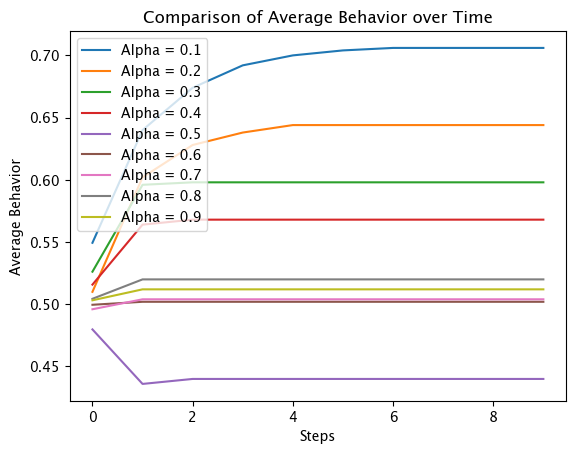

In [44]:
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import NetworkGrid
from mesa.datacollection import DataCollector
import networkx as nx
import random
import matplotlib.pyplot as plt

class SocialAgent(Agent):
    def __init__(self, unique_id, model, alpha):
        super().__init__(unique_id, model)
        self.alpha = alpha
        self.behavior = random.choice([0,0.1, 0.3, 0.5, 0.7, 0.9,1])

    def step(self):
        neighbors = self.model.grid.get_neighbors(self.pos)
        neighbor_behaviors = [neighbor.behavior for neighbor in neighbors]
        
        if neighbor_behaviors:
            avg_neighbor_behavior = sum(neighbor_behaviors) / len(neighbor_behaviors)
        else:
            avg_neighbor_behavior = 0
        
        self.behavior = self.alpha * self.behavior + (1 - self.alpha) * avg_neighbor_behavior
        self.behavior = 1 if self.behavior >= 0.5 else 0

class SocialNormModel(Model):
    def __init__(self, num_agents, avg_node_degree, rewiring_prob, alpha):
        self.num_agents = num_agents
        self.G = nx.watts_strogatz_graph(n=num_agents, k=avg_node_degree, p=rewiring_prob)
        self.grid = NetworkGrid(self.G)
        self.schedule = RandomActivation(self)
        
        for i in range(num_agents):
            agent = SocialAgent(i, self, alpha)  # 所有主体使用同一个 alpha
            self.schedule.add(agent)
            self.grid.place_agent(agent, i)

        self.datacollector = DataCollector(
            agent_reporters={"Behavior": lambda a: a.behavior}
        )

    def step(self):
        self.datacollector.collect(self)
        self.schedule.step()

def run_model(num_agents, avg_node_degree, rewiring_prob, alpha_values, num_steps):
    for alpha in alpha_values:
        model = SocialNormModel(num_agents, avg_node_degree, rewiring_prob, alpha)
        
        for _ in range(num_steps):
            model.step()
        
        data = model.datacollector.get_agent_vars_dataframe()
        
        average_behavior = data.groupby("Step").mean()
        plt.plot(average_behavior["Behavior"], label=f"Alpha = {alpha}")
    
    plt.xlabel("Steps")
    plt.ylabel("Average Behavior")
    plt.title("Comparison of Average Behavior over Time")
    plt.legend()
    plt.show()

# 参数设置
num_agents = 500
avg_node_degree = 4
rewiring_prob = 0.8  # 重新连接概率
alpha_values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]  # 不同的 alpha 值
num_steps = 10

# 运行模型并比较不同 alpha 值下的规范变化
run_model(num_agents, avg_node_degree, rewiring_prob, alpha_values, num_steps)


/var/folders/2k/gl2zft0n43b646yzs175ky_m0000gn/T/ipykernel_71409/3274965391.py:12: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)
/var/folders/2k/gl2zft0n43b646yzs175ky_m0000gn/T/ipykernel_71409/3274965391.py:12: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)
/var/folders/2k/gl2zft0n43b646yzs175ky_m0000gn/T/ipykernel_71409/3274965391.py:12: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


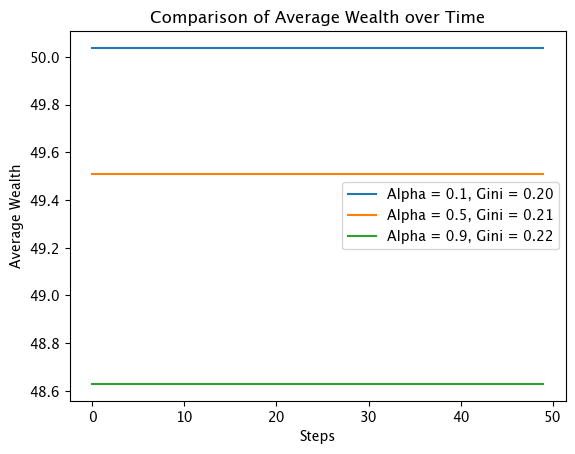

/var/folders/2k/gl2zft0n43b646yzs175ky_m0000gn/T/ipykernel_71409/3274965391.py:12: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)
/var/folders/2k/gl2zft0n43b646yzs175ky_m0000gn/T/ipykernel_71409/3274965391.py:12: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)
/var/folders/2k/gl2zft0n43b646yzs175ky_m0000gn/T/ipykernel_71409/3274965391.py:12: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


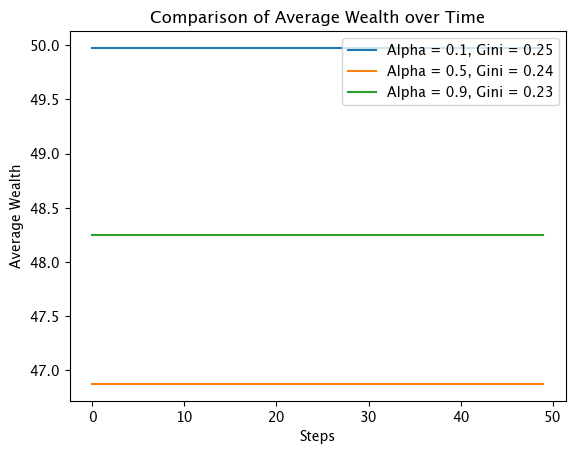

In [25]:
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import NetworkGrid
from mesa.datacollection import DataCollector
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np

class SocialAgent(Agent):
    def __init__(self, unique_id, model, alpha, wealth, short_term_bias):
        super().__init__(unique_id, model)
        self.alpha = alpha  # 自私/利他性
        self.wealth = wealth  # 资源或财富
        self.short_term_bias = short_term_bias  # 短期收益偏好

    def step(self):
        neighbors = self.model.grid.get_neighbors(self.pos, include_center=False)
        if not neighbors:
            return

        neighbor = self.random.choice(neighbors)
        trade_amount = self.wealth * 0.1

        if self.short_term_bias:
            # 短期收益偏好，优先考虑自己的收益
            self_gain = trade_amount * (1 - self.alpha)
            neighbor_gain = trade_amount * self.alpha
        else:
            # 长期收益偏好，优先考虑邻居的收益
            self_gain = trade_amount * self.alpha
            neighbor_gain = trade_amount * (1 - self.alpha)

        self.wealth += self_gain - trade_amount
        neighbor.wealth += neighbor_gain

class SocialNormModel(Model):
    def __init__(self, num_agents, avg_node_degree, rewiring_prob, alpha, short_term_bias):
        self.num_agents = num_agents
        self.G = nx.watts_strogatz_graph(n=num_agents, k=avg_node_degree, p=rewiring_prob)
        self.grid = NetworkGrid(self.G)
        self.schedule = RandomActivation(self)

        for i in range(num_agents):
            wealth = random.uniform(1, 100)  # 随机初始财富
            agent = SocialAgent(i, self, alpha, wealth, short_term_bias)
            self.schedule.add(agent)
            self.grid.place_agent(agent, i)

        self.datacollector = DataCollector(
            agent_reporters={"Wealth": "wealth"}
        )

    def step(self):
        self.datacollector.collect(self)
        self.schedule.step()

def run_model(num_agents, avg_node_degree, rewiring_prob, alpha_values, short_term_bias, num_steps):
    for alpha in alpha_values:
        model = SocialNormModel(num_agents, avg_node_degree, rewiring_prob, alpha, short_term_bias)
        
        for _ in range(num_steps):
            model.step()
        
        data = model.datacollector.get_agent_vars_dataframe()
        final_wealth = data.xs(num_steps-1, level="Step")["Wealth"]
        gini = gini_coefficient(final_wealth)
        
        average_wealth = data.groupby("Step").mean()
        plt.plot(average_wealth["Wealth"], label=f"Alpha = {alpha}, Gini = {gini:.2f}")
    
    plt.xlabel("Steps")
    plt.ylabel("Average Wealth")
    plt.title("Comparison of Average Wealth over Time")
    plt.legend()
    plt.show()

def gini_coefficient(wealths):
    sorted_wealths = np.sort(wealths)
    n = len(wealths)
    cumulative_wealths = np.cumsum(sorted_wealths)
    gini_index = (2 * np.sum((np.arange(1, n + 1) - 0.5) * sorted_wealths)) / (n * np.sum(sorted_wealths)) - 1
    return gini_index

# 参数设置
num_agents = 100
avg_node_degree = 4
rewiring_prob = 0.9  # 重新连接概率
alpha_values = [0.1, 0.5, 0.9]  # 不同的 alpha 值
short_term_bias = True  # 短期收益偏好
num_steps = 50

# 运行模型并比较不同 alpha 值下的财富分配和贫富差距
run_model(num_agents, avg_node_degree, rewiring_prob, alpha_values, short_term_bias, num_steps)

# 对比长期收益偏好
short_term_bias = False  # 长期收益偏好
run_model(num_agents, avg_node_degree, rewiring_prob, alpha_values, short_term_bias, num_steps)


/var/folders/2k/gl2zft0n43b646yzs175ky_m0000gn/T/ipykernel_71409/686832266.py:12: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)
/var/folders/2k/gl2zft0n43b646yzs175ky_m0000gn/T/ipykernel_71409/686832266.py:12: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)
/var/folders/2k/gl2zft0n43b646yzs175ky_m0000gn/T/ipykernel_71409/686832266.py:12: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


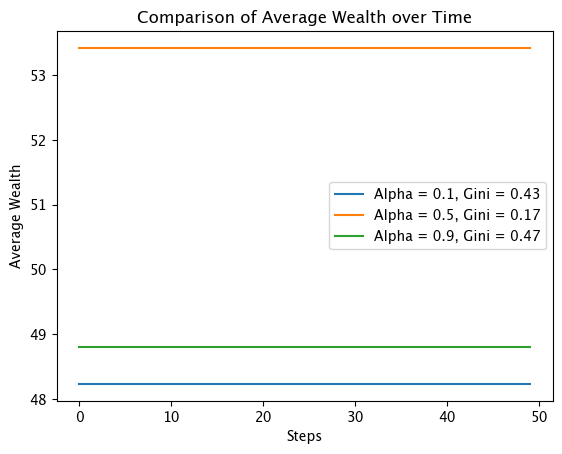

In [29]:
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import NetworkGrid
from mesa.datacollection import DataCollector
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np

class SocialAgent(Agent):
    def __init__(self, unique_id, model, alpha, wealth):
        super().__init__(unique_id, model)
        self.alpha = alpha  # 自私/利他性
        self.wealth = wealth  # 财富
        self.trade_preference = random.choice([0, 1])  # 短期/长期收益偏好

    def step(self):
        neighbors = self.model.grid.get_neighbors(self.pos)
        if not neighbors:
            return

        neighbor = self.random.choice(neighbors)
        trade_amount = self.wealth * 0.1

        if self.trade_preference == 0:
            # 短期收益偏好，优先考虑自己的收益
            self_gain = trade_amount * (1 - self.alpha)
            neighbor_gain = trade_amount * self.alpha
        else:
            # 长期收益偏好，优先考虑邻居的收益
            self_gain = trade_amount * self.alpha
            neighbor_gain = trade_amount * (1 - self.alpha)

        self.wealth += self_gain - trade_amount
        neighbor.wealth += neighbor_gain

class SocialNormModel(Model):
    def __init__(self, num_agents, avg_node_degree, rewiring_prob, alpha):
        self.num_agents = num_agents
        self.G = nx.watts_strogatz_graph(n=num_agents, k=avg_node_degree, p=rewiring_prob)
        self.grid = NetworkGrid(self.G)
        self.schedule = RandomActivation(self)

        for i in range(num_agents):
            wealth = random.uniform(1, 100)  # 初始财富
            agent = SocialAgent(i, self, alpha, wealth)
            self.schedule.add(agent)
            self.grid.place_agent(agent, i)

        self.datacollector = DataCollector(
            agent_reporters={"Wealth": "wealth"}
        )

    def step(self):
        self.datacollector.collect(self)
        self.schedule.step()

def run_model(num_agents, avg_node_degree, rewiring_prob, alpha_values, num_steps):
    for alpha in alpha_values:
        model = SocialNormModel(num_agents, avg_node_degree, rewiring_prob, alpha)
        
        for _ in range(num_steps):
            model.step()
        
        data = model.datacollector.get_agent_vars_dataframe()
        final_wealth = data.xs(num_steps-1, level="Step")["Wealth"]
        gini = gini_coefficient(final_wealth)
        
        average_wealth = data.groupby("Step").mean()
        plt.plot(average_wealth["Wealth"], label=f"Alpha = {alpha}, Gini = {gini:.2f}")
    
    plt.xlabel("Steps")
    plt.ylabel("Average Wealth")
    plt.title("Comparison of Average Wealth over Time")
    plt.legend()
    plt.show()

def gini_coefficient(wealths):
    sorted_wealths = np.sort(wealths)
    n = len(wealths)
    cumulative_wealths = np.cumsum(sorted_wealths)
    gini_index = (2 * np.sum((np.arange(1, n + 1) - 0.5) * sorted_wealths)) / (n * np.sum(sorted_wealths)) - 1
    return gini_index

# 参数设置
num_agents = 100
avg_node_degree = 4
rewiring_prob = 0.3  # 重新连接概率
alpha_values = [0.1, 0.5, 0.9]  # 不同的 alpha 值
num_steps = 50

# 运行模型并比较不同 alpha 值下的财富分配和贫富差距
run_model(num_agents, avg_node_degree, rewiring_prob, alpha_values, num_steps)


/var/folders/2k/gl2zft0n43b646yzs175ky_m0000gn/T/ipykernel_71409/3651456010.py:12: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


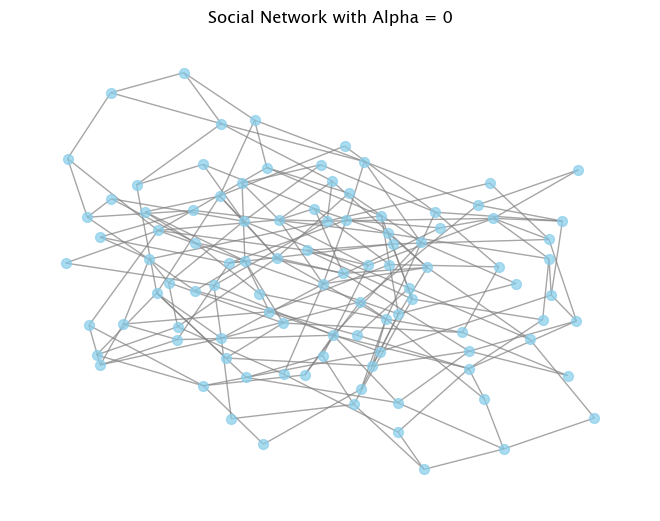

/var/folders/2k/gl2zft0n43b646yzs175ky_m0000gn/T/ipykernel_71409/3651456010.py:12: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


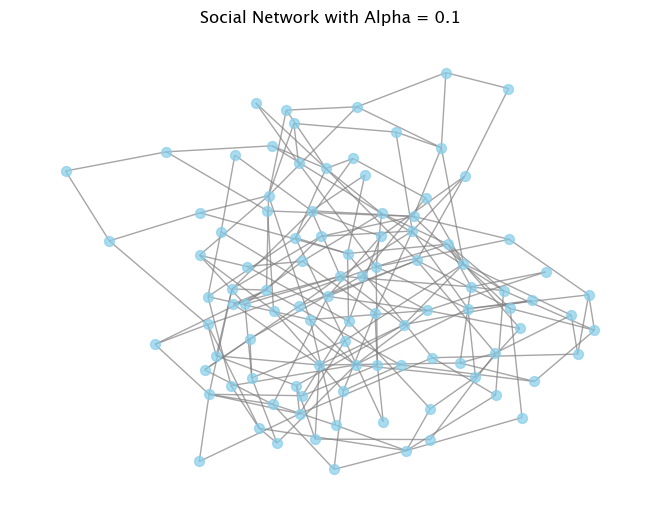

/var/folders/2k/gl2zft0n43b646yzs175ky_m0000gn/T/ipykernel_71409/3651456010.py:12: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


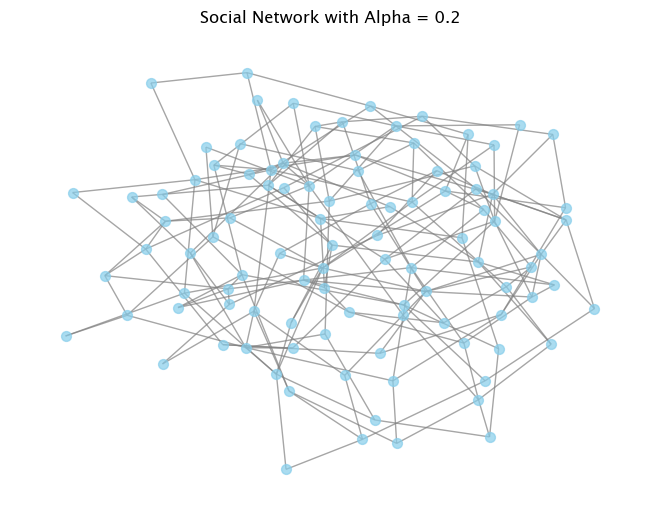

/var/folders/2k/gl2zft0n43b646yzs175ky_m0000gn/T/ipykernel_71409/3651456010.py:12: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


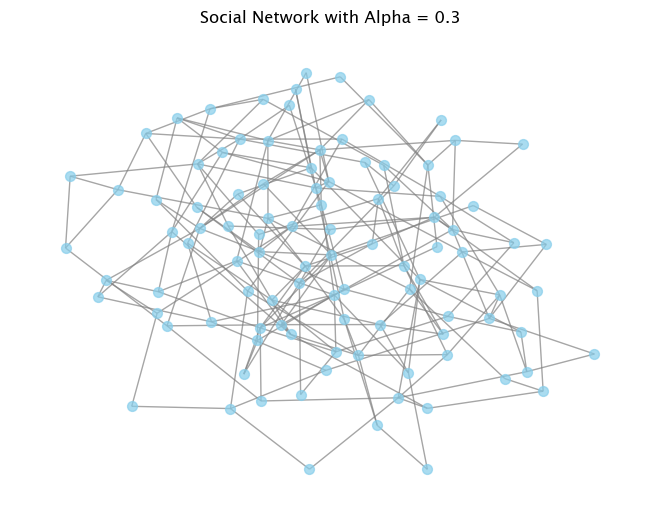

/var/folders/2k/gl2zft0n43b646yzs175ky_m0000gn/T/ipykernel_71409/3651456010.py:12: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


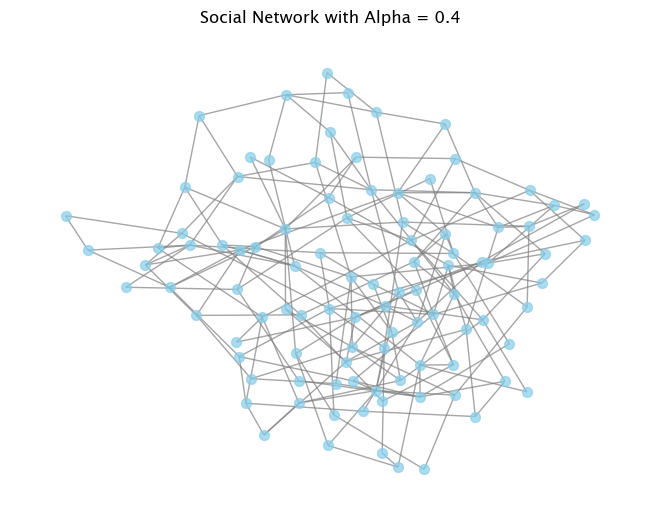

/var/folders/2k/gl2zft0n43b646yzs175ky_m0000gn/T/ipykernel_71409/3651456010.py:12: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


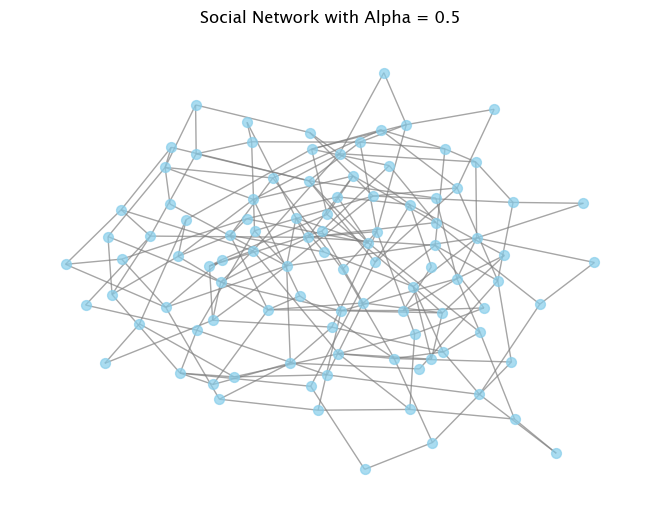

/var/folders/2k/gl2zft0n43b646yzs175ky_m0000gn/T/ipykernel_71409/3651456010.py:12: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


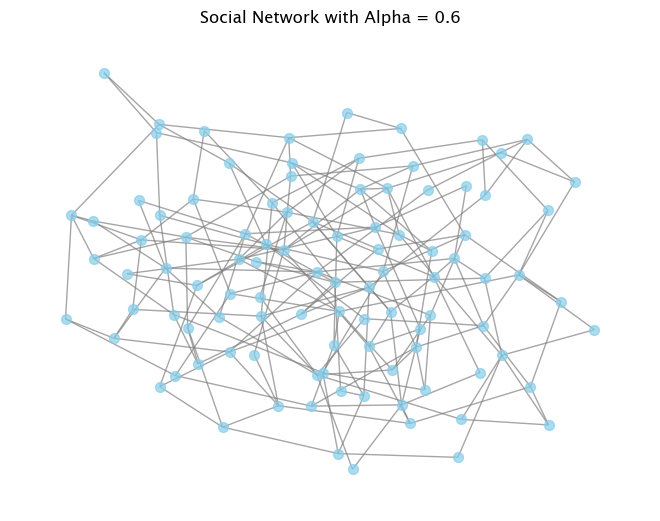

/var/folders/2k/gl2zft0n43b646yzs175ky_m0000gn/T/ipykernel_71409/3651456010.py:12: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


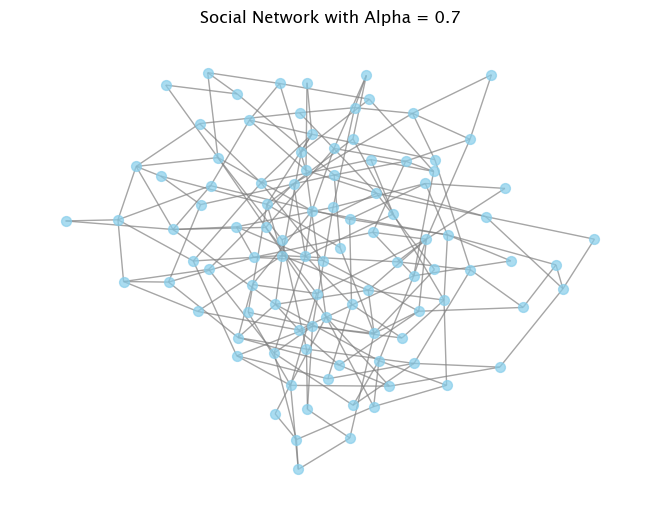

/var/folders/2k/gl2zft0n43b646yzs175ky_m0000gn/T/ipykernel_71409/3651456010.py:12: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


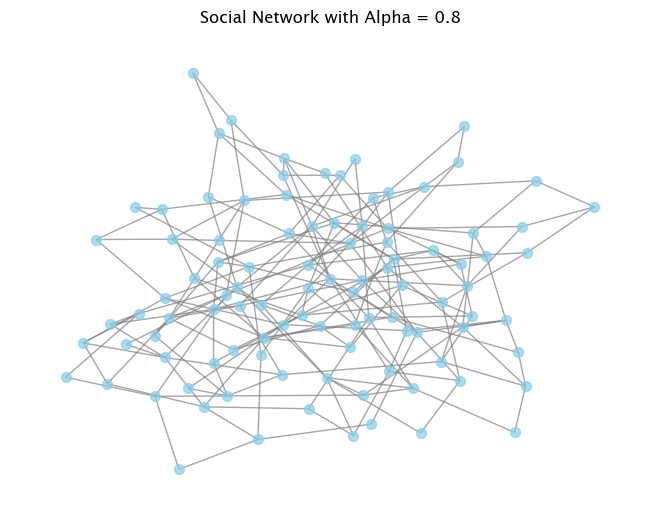

/var/folders/2k/gl2zft0n43b646yzs175ky_m0000gn/T/ipykernel_71409/3651456010.py:12: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


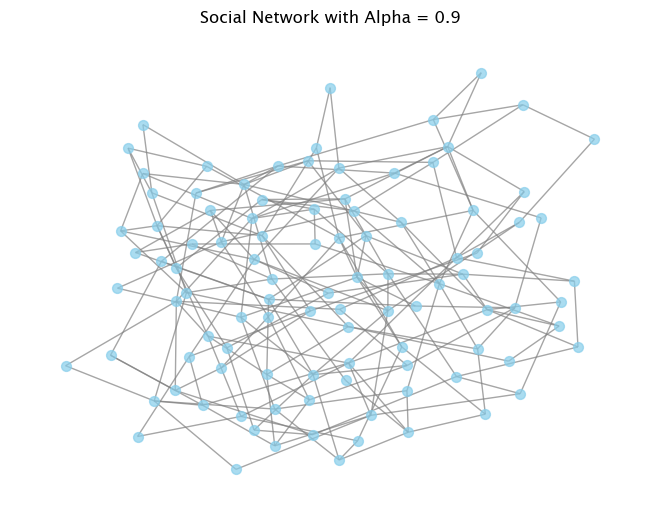

/var/folders/2k/gl2zft0n43b646yzs175ky_m0000gn/T/ipykernel_71409/3651456010.py:12: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


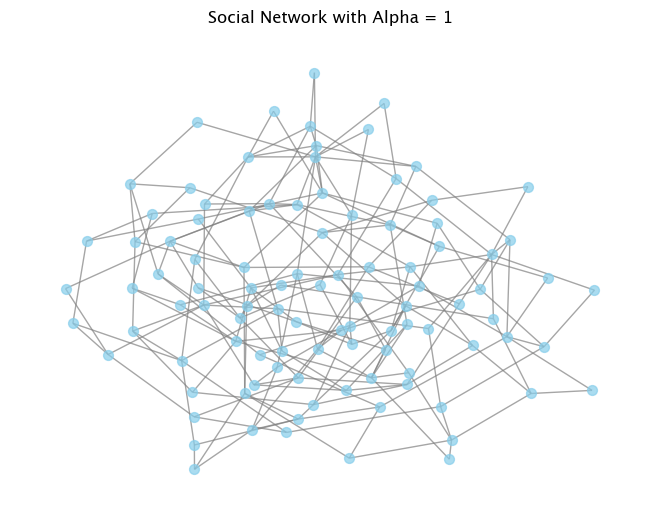

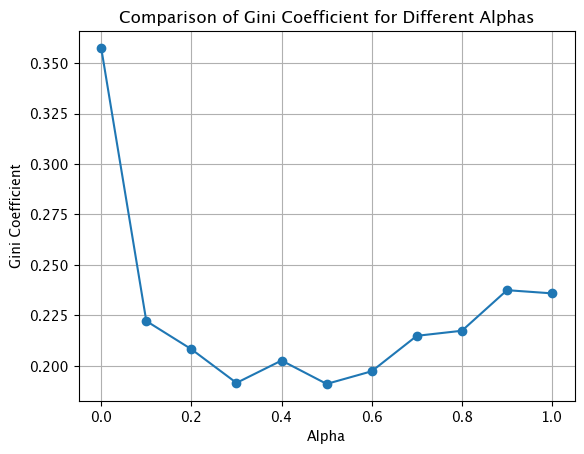

In [37]:
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import NetworkGrid
from mesa.datacollection import DataCollector
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np

class SocialAgent(Agent):
    def __init__(self, unique_id, model, alpha, wealth):
        super().__init__(unique_id, model)
        self.alpha = alpha  # 自私/利他性
        self.wealth = wealth  # 财富
        self.trade_preference = 0
#         self.trade_preference = random.choice([0, 1])  # 短期/长期收益偏好

    def step(self):
        neighbors = self.model.grid.get_neighbors(self.pos)
        if not neighbors:
            return

        neighbor = self.random.choice(neighbors)
        trade_amount = self.wealth * 0.1

        if self.trade_preference == 0:
            # 短期收益偏好，优先考虑自己的收益
            self_gain = trade_amount * (1 - self.alpha)
            neighbor_gain = trade_amount * self.alpha
        else:
            # 长期收益偏好，优先考虑邻居的收益
            self_gain = trade_amount * self.alpha
            neighbor_gain = trade_amount * (1 - self.alpha)

        self.wealth += self_gain - trade_amount
        neighbor.wealth += neighbor_gain

class SocialNormModel(Model):
    def __init__(self, num_agents, avg_node_degree, rewiring_prob, alpha):
        self.num_agents = num_agents
        self.G = nx.watts_strogatz_graph(n=num_agents, k=avg_node_degree, p=rewiring_prob)
        self.grid = NetworkGrid(self.G)
        self.schedule = RandomActivation(self)

        for i in range(num_agents):
            wealth = random.uniform(1, 100)  # 初始财富
            agent = SocialAgent(i, self, alpha, wealth)
            self.schedule.add(agent)
            self.grid.place_agent(agent, i)

        self.datacollector = DataCollector(
            agent_reporters={"Wealth": "wealth"}
        )

    def step(self):
        self.datacollector.collect(self)
        self.schedule.step()

def run_model(num_agents, avg_node_degree, rewiring_prob, alpha_values, num_steps):
    gini_results = []

    for alpha in alpha_values:
        model = SocialNormModel(num_agents, avg_node_degree, rewiring_prob, alpha)
        
        for _ in range(num_steps):
            model.step()
        
        data = model.datacollector.get_agent_vars_dataframe()
        final_wealth = data.xs(num_steps-1, level="Step")["Wealth"]
        gini = gini_coefficient(final_wealth)
        gini_results.append(gini)

        # 绘制网络图
        pos = nx.spring_layout(model.G, seed=42)
        nx.draw(model.G, pos, with_labels=False, node_color='skyblue', node_size=50, edge_color='gray', alpha=0.7)
        plt.title(f"Social Network with Alpha = {alpha}")
        plt.show()

    # 绘制基尼系数比较图
    plt.plot(alpha_values, gini_results, marker='o')
    plt.xlabel('Alpha')
    plt.ylabel('Gini Coefficient')
    plt.title('Comparison of Gini Coefficient for Different Alphas')
    plt.grid(True)
    plt.show()

def gini_coefficient(wealths):
    sorted_wealths = np.sort(wealths)
    n = len(wealths)
    cumulative_wealths = np.cumsum(sorted_wealths)
    gini_index = (2 * np.sum((np.arange(1, n + 1) - 0.5) * sorted_wealths)) / (n * np.sum(sorted_wealths)) - 1
    return gini_index

# 参数设置
num_agents = 100
avg_node_degree = 4
rewiring_prob = 0.8  # 重新连接概率
alpha_values = [0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1]  # 不同的 alpha 值
num_steps = 50

# 运行模型并比较不同 alpha 值下的基尼系数和网络图
run_model(num_agents, avg_node_degree, rewiring_prob, alpha_values, num_steps)


/var/folders/2k/gl2zft0n43b646yzs175ky_m0000gn/T/ipykernel_71409/1016740706.py:12: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)
/var/folders/2k/gl2zft0n43b646yzs175ky_m0000gn/T/ipykernel_71409/1016740706.py:12: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)
/var/folders/2k/gl2zft0n43b646yzs175ky_m0000gn/T/ipykernel_71409/1016740706.py:12: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)
/var/folders/2k/gl2zft0n43b646yzs175ky_m0000gn/T/ipykernel_71409/1016740706.py:12: FutureWarning: The Mesa Model class was not initialized. In th

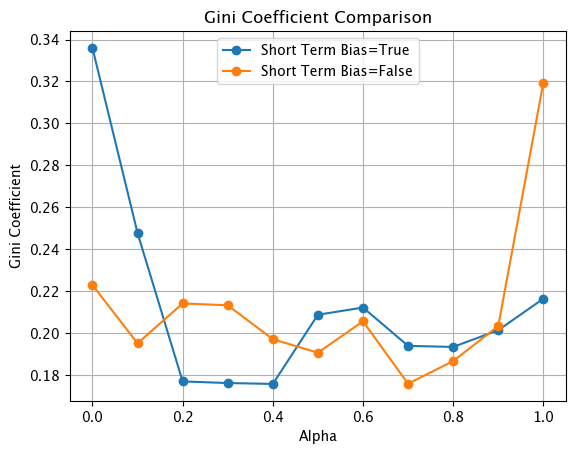

In [42]:
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import NetworkGrid
from mesa.datacollection import DataCollector
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np

class SocialAgent(Agent):
    def __init__(self, unique_id, model, alpha, wealth, short_term_bias):
        super().__init__(unique_id, model)
        self.alpha = alpha  # 自私/利他性 altruistic
        self.wealth = wealth  # 财富
        self.short_term_bias = short_term_bias  # 短期收益偏好

    def step(self):
        neighbors = self.model.grid.get_neighbors(self.pos)
        if not neighbors:
            return

        neighbor = self.random.choice(neighbors)
        trade_amount = self.wealth * 0.1

        if self.short_term_bias:
            # 短期收益偏好，优先考虑自己的收益
                self_gain = trade_amount * (1 - self.alpha)
                neighbor_gain = trade_amount * self.alpha
        else:
            # 长期收益偏好，优先考虑邻居的收益
            self_gain = trade_amount * self.alpha
            neighbor_gain = trade_amount * (1 - self.alpha)

        self.wealth += self_gain - trade_amount
        neighbor.wealth += neighbor_gain

class SocialNormModel(Model):
    def __init__(self, num_agents, avg_node_degree, rewiring_prob, alpha, short_term_bias):
        self.num_agents = num_agents
        self.G = nx.watts_strogatz_graph(n=num_agents, k=avg_node_degree, p=rewiring_prob)
        self.grid = NetworkGrid(self.G)
        self.schedule = RandomActivation(self)

        for i in range(num_agents):
            wealth = random.uniform(1, 100)  # 初始财富
            agent = SocialAgent(i, self, alpha, wealth, short_term_bias)
            self.schedule.add(agent)
            self.grid.place_agent(agent, i)

        self.datacollector = DataCollector(
            agent_reporters={"Wealth": "wealth"}
        )

    def step(self):
        self.datacollector.collect(self)
        self.schedule.step()

def run_model(num_agents, avg_node_degree, rewiring_prob, alpha_values, short_term_bias_values, num_steps):
    gini_results = []

    for short_term_bias in short_term_bias_values:
        for alpha in alpha_values:
            model = SocialNormModel(num_agents, avg_node_degree, rewiring_prob, alpha, short_term_bias)
            
            for _ in range(num_steps):
                model.step()
            
            data = model.datacollector.get_agent_vars_dataframe()
            final_wealth = data.xs(num_steps-1, level="Step")["Wealth"]
            gini = gini_coefficient(final_wealth)
            gini_results.append((alpha, short_term_bias, gini))

            # 绘制网络图
#             pos = nx.spring_layout(model.G, seed=42)
#             nx.draw(model.G, pos, with_labels=False, node_color='skyblue', node_size=50, edge_color='gray', alpha=0.7)
#             plt.title(f"Network (Alpha={alpha}, Short Term Bias={short_term_bias})")
#             plt.show()

    # 绘制基尼系数比较图
    for short_term_bias in short_term_bias_values:
        bias_results = [result[2] for result in gini_results if result[1] == short_term_bias]
        plt.plot(alpha_values, bias_results, marker='o', label=f'Short Term Bias={short_term_bias}')

    plt.xlabel('Alpha')
    plt.ylabel('Gini Coefficient')
    plt.title('Gini Coefficient Comparison')
    plt.legend()
    plt.grid(True)
    plt.show()

def gini_coefficient(wealths):
    sorted_wealths = np.sort(wealths)
    n = len(wealths)
    cumulative_wealths = np.cumsum(sorted_wealths)
    gini_index = (2 * np.sum((np.arange(1, n + 1) - 0.5) * sorted_wealths)) / (n * np.sum(sorted_wealths)) - 1
    return gini_index

# 参数设置
num_agents = 200
avg_node_degree = 4
rewiring_prob = 0.5  # 重新连接概率
alpha_values = [0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1]  # 不同的 alpha 值
short_term_bias_values = [True, False]  # 短期收益偏好和长期收益偏好
num_steps = 50

# 运行模型并比较不同 alpha 值和收益偏好下的基尼系数和网络图
run_model(num_agents, avg_node_degree, rewiring_prob, alpha_values, short_term_bias_values, num_steps)
